In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style='color: orange'>Carga del Dataset de Mendoza</h1>

In [4]:
mendoza_df = pd.read_csv('mendoza-ciudad.csv',
                      converters={'mts2': lambda x: float(x[:-2]), 'mts2_house': lambda x: float(x[:-2]), 
                                 #'Price': lambda x: float(x[3:])
                                 }) 

In [5]:
# Quitamos la columna rara del principio
house_df = mendoza_df.iloc[:,1:]

In [6]:
house_df

,Country,Address,mts2,mts2_house,Bathrooms,Bedrooms,Price
0,Capital,Mendoza,300.0,175.0,3.0,3.0,US$ 215.000
1,Capital,Mendoza,120.0,110.0,2.0,4.0,US$ 180.000
2,Capital,Mendoza,143.0,200.0,4.0,4.0,US$ 150.000
3,Capital,Mendoza,273.0,273.0,4.0,1.0,US$ 210.000
4,Capital,Mendoza,596.0,308.0,4.0,4.0,US$ 340.000
...,...,...,...,...,...,...,...
634,Capital,Mendoza,300.0,160.0,1.0,2.0,US$ 50.000
635,Capital,Mendoza,283.0,216.0,3.0,4.0,US$ 155.000
636,Capital,Mendoza,180.0,175.0,1.0,2.0,US$ 35.000
637,Capital,Mendoza,170.0,120.0,1.0,2.0,US$ 39.500


In [7]:
# Verificamos que los datos esten bien cargados
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     639 non-null    object 
 1   Address     639 non-null    object 
 2   mts2        639 non-null    float64
 3   mts2_house  639 non-null    float64
 4   Bathrooms   638 non-null    float64
 5   Bedrooms    637 non-null    float64
 6   Price       639 non-null    object 
dtypes: float64(4), object(3)
memory usage: 35.1+ KB


In [8]:
# Pasaremos a float el precio de la casa (no pude con .map así que usé este método)
import re
for i in range(len(house_df.Price)):
    new_price = "" 
    numbers = re.findall(r'\d', house_df['Price'][i])
    for j in numbers:
        new_price += j
    try:
        house_df['Price'][i] = float(new_price)
    except:
        print(new_price)

<ipython-input-8-3019eeebc955>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['Price'][i] = float(new_price)


In [9]:
house_df['Price'] = house_df['Price'].astype(float)

<h1 style='color: green'>Análisis Exploratorio</h1>

In [10]:
# Análisis descriptivo
house_df.describe().T

#la media del tamaño del terreno es de 675 mts2
# la media del tamaño de la casa es de 255 mts2

# las casas suelen tener entre 3 a 4 dormitorios
# las casas tienen 3 baños en promedio

# EL precio promedio de las casas es de 250,500 dólares aproximadamente.

,count,mean,std,min,25%,50%,75%,max
mts2,639.0,389.798122,474.511157,45.0,203.5,300.0,450.0,10000.0
mts2_house,639.0,242.533646,145.707328,45.0,160.0,216.0,297.5,1992.0
Bathrooms,638.0,2.832288,1.173393,1.0,2.0,3.0,3.0,9.0
Bedrooms,637.0,3.521193,1.129203,1.0,3.0,3.0,4.0,9.0
Price,639.0,249388.234742,811090.941281,19000.0,96500.0,185000.0,280000.0,20000000.0


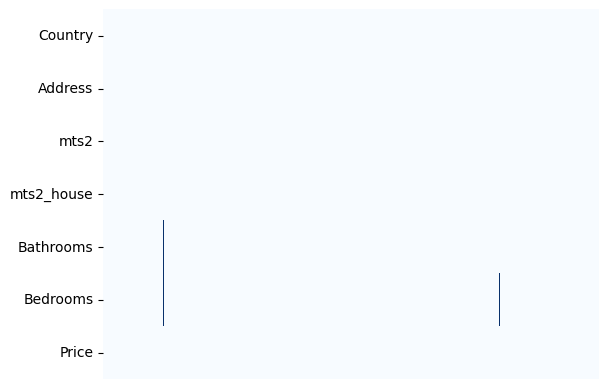

In [11]:
# Vamos a ver si faltan datos con un gráfico
sns.heatmap(house_df.isnull().T, xticklabels=False, cbar=False, cmap='Blues')
plt.show()

In [12]:
# Estos son los 3 valores nulos que hay
house_df[house_df.isnull().any(1)]

,Country,Address,mts2,mts2_house,Bathrooms,Bedrooms,Price
78,Capital,Mendoza,224.0,115.0,NaN,NaN,65000.0
511,Capital,Mendoza,370.0,332.0,2.0,NaN,195000.0


In [13]:
# Reemplazaremos con la media de la columna a la que pertenece
house_df.loc[(house_df['Bathrooms'].isnull() == True), 'Bathrooms'] = round(house_df.Bathrooms.mean())
house_df.loc[(house_df['Bedrooms'].isnull() == True), 'Bedrooms'] = round(house_df.Bedrooms.mean())

In [14]:
# No quead ningún dato nulo
house_df[house_df.isnull().any(1)]

,Country,Address,mts2,mts2_house,Bathrooms,Bedrooms,Price


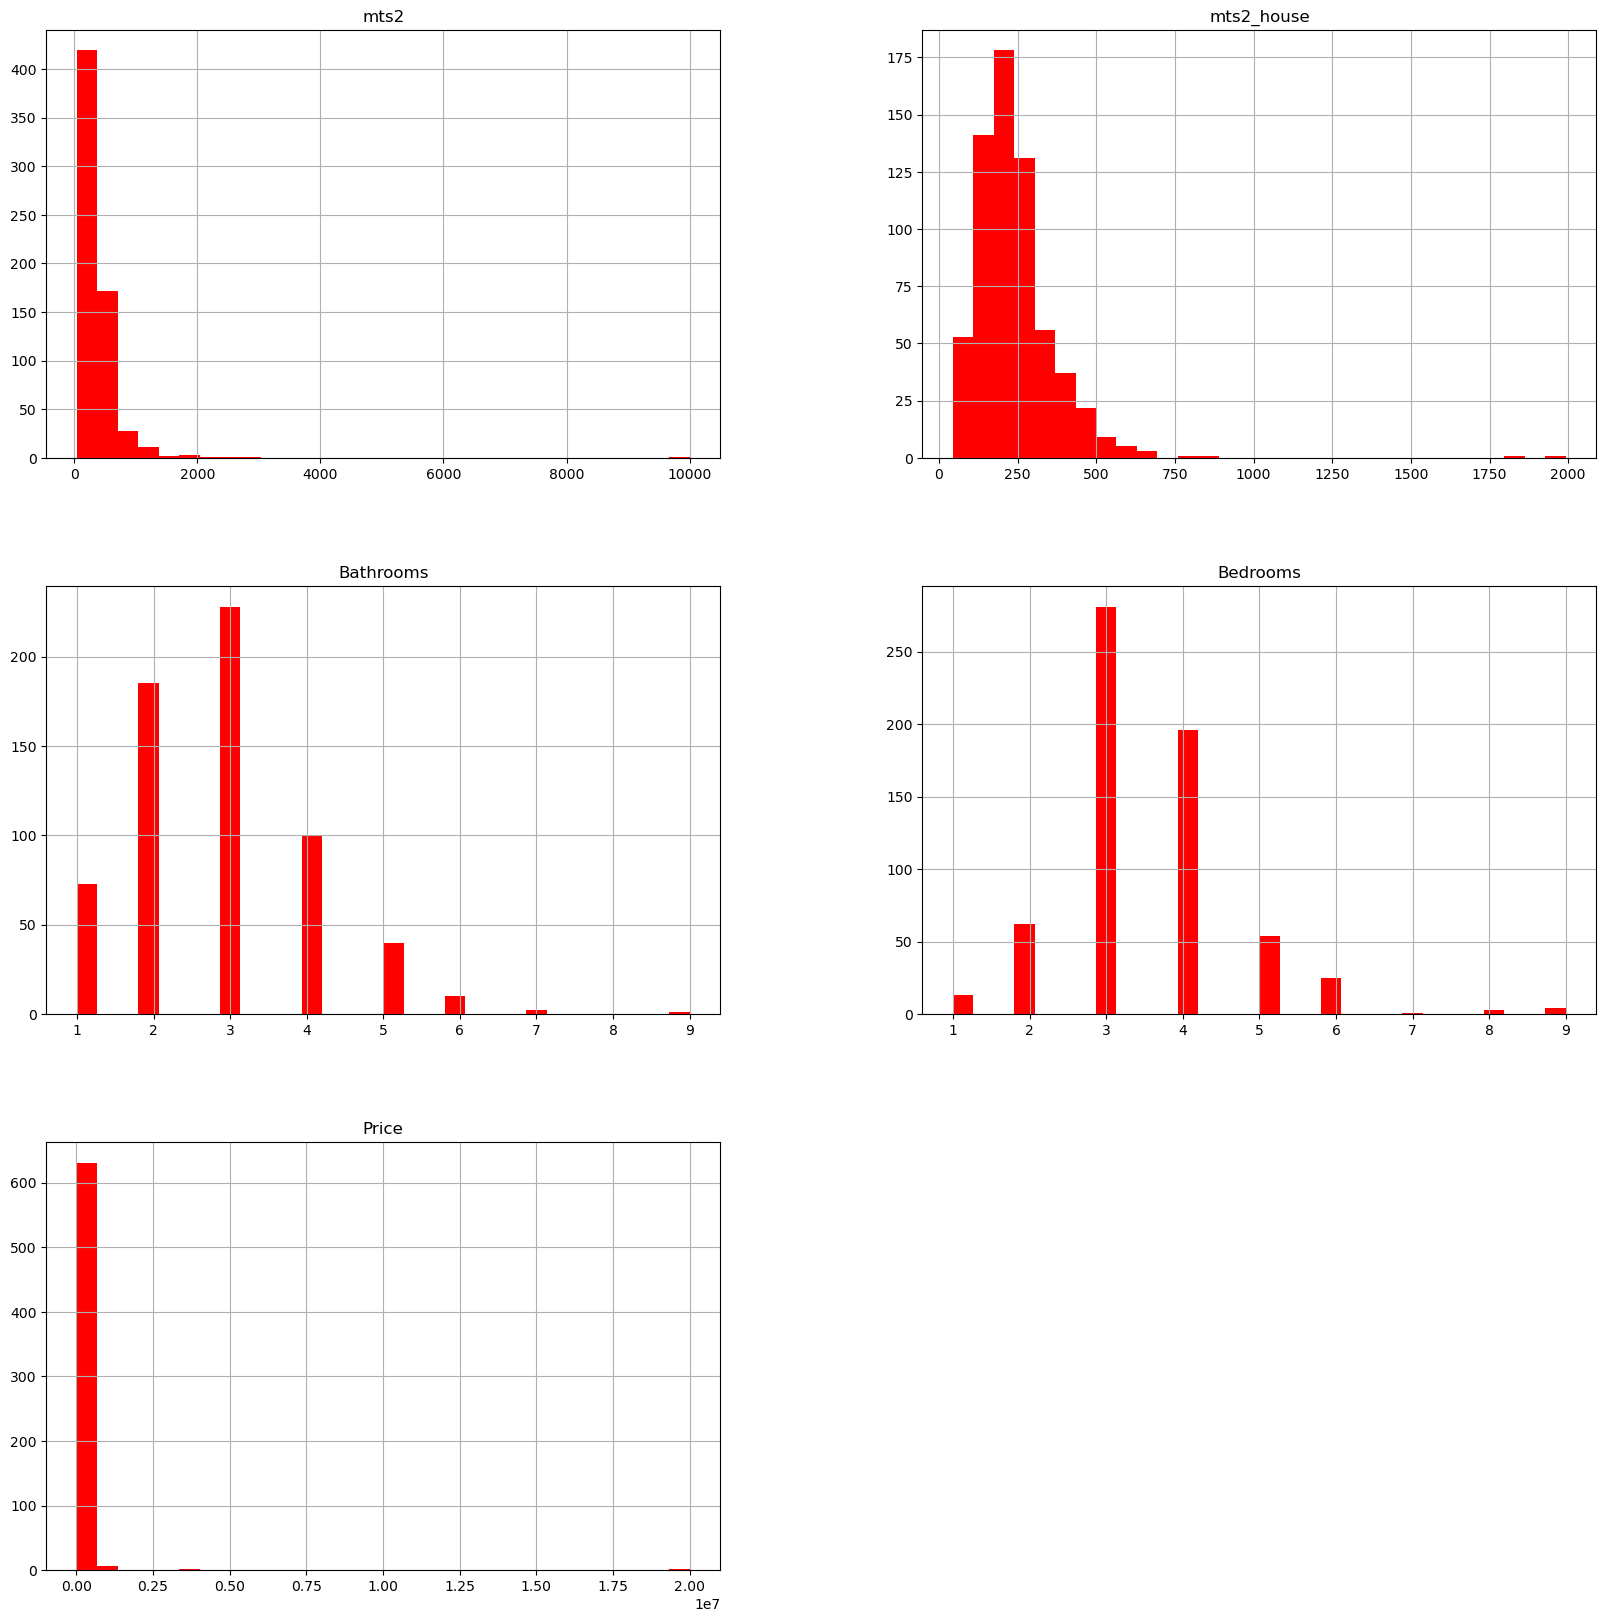

In [15]:
# Veamos la distribución de las características
house_df.hist(bins=30, figsize=(20,20), color='r')
plt.show()

# El tamaño de la casa presenta una distribución long tail en ambos gráficos
# Es normal que hayan 3 baños y 3 dormitorios en cada casa
# En el precio el gráfico se ve algo mal por un outlier

In [16]:
new_df = house_df[house_df['Price'] != 20000000.0]
new_df = new_df[new_df['Price'] != 4000000.0]
new_df = new_df[new_df['mts2_house'] != 1992.0]

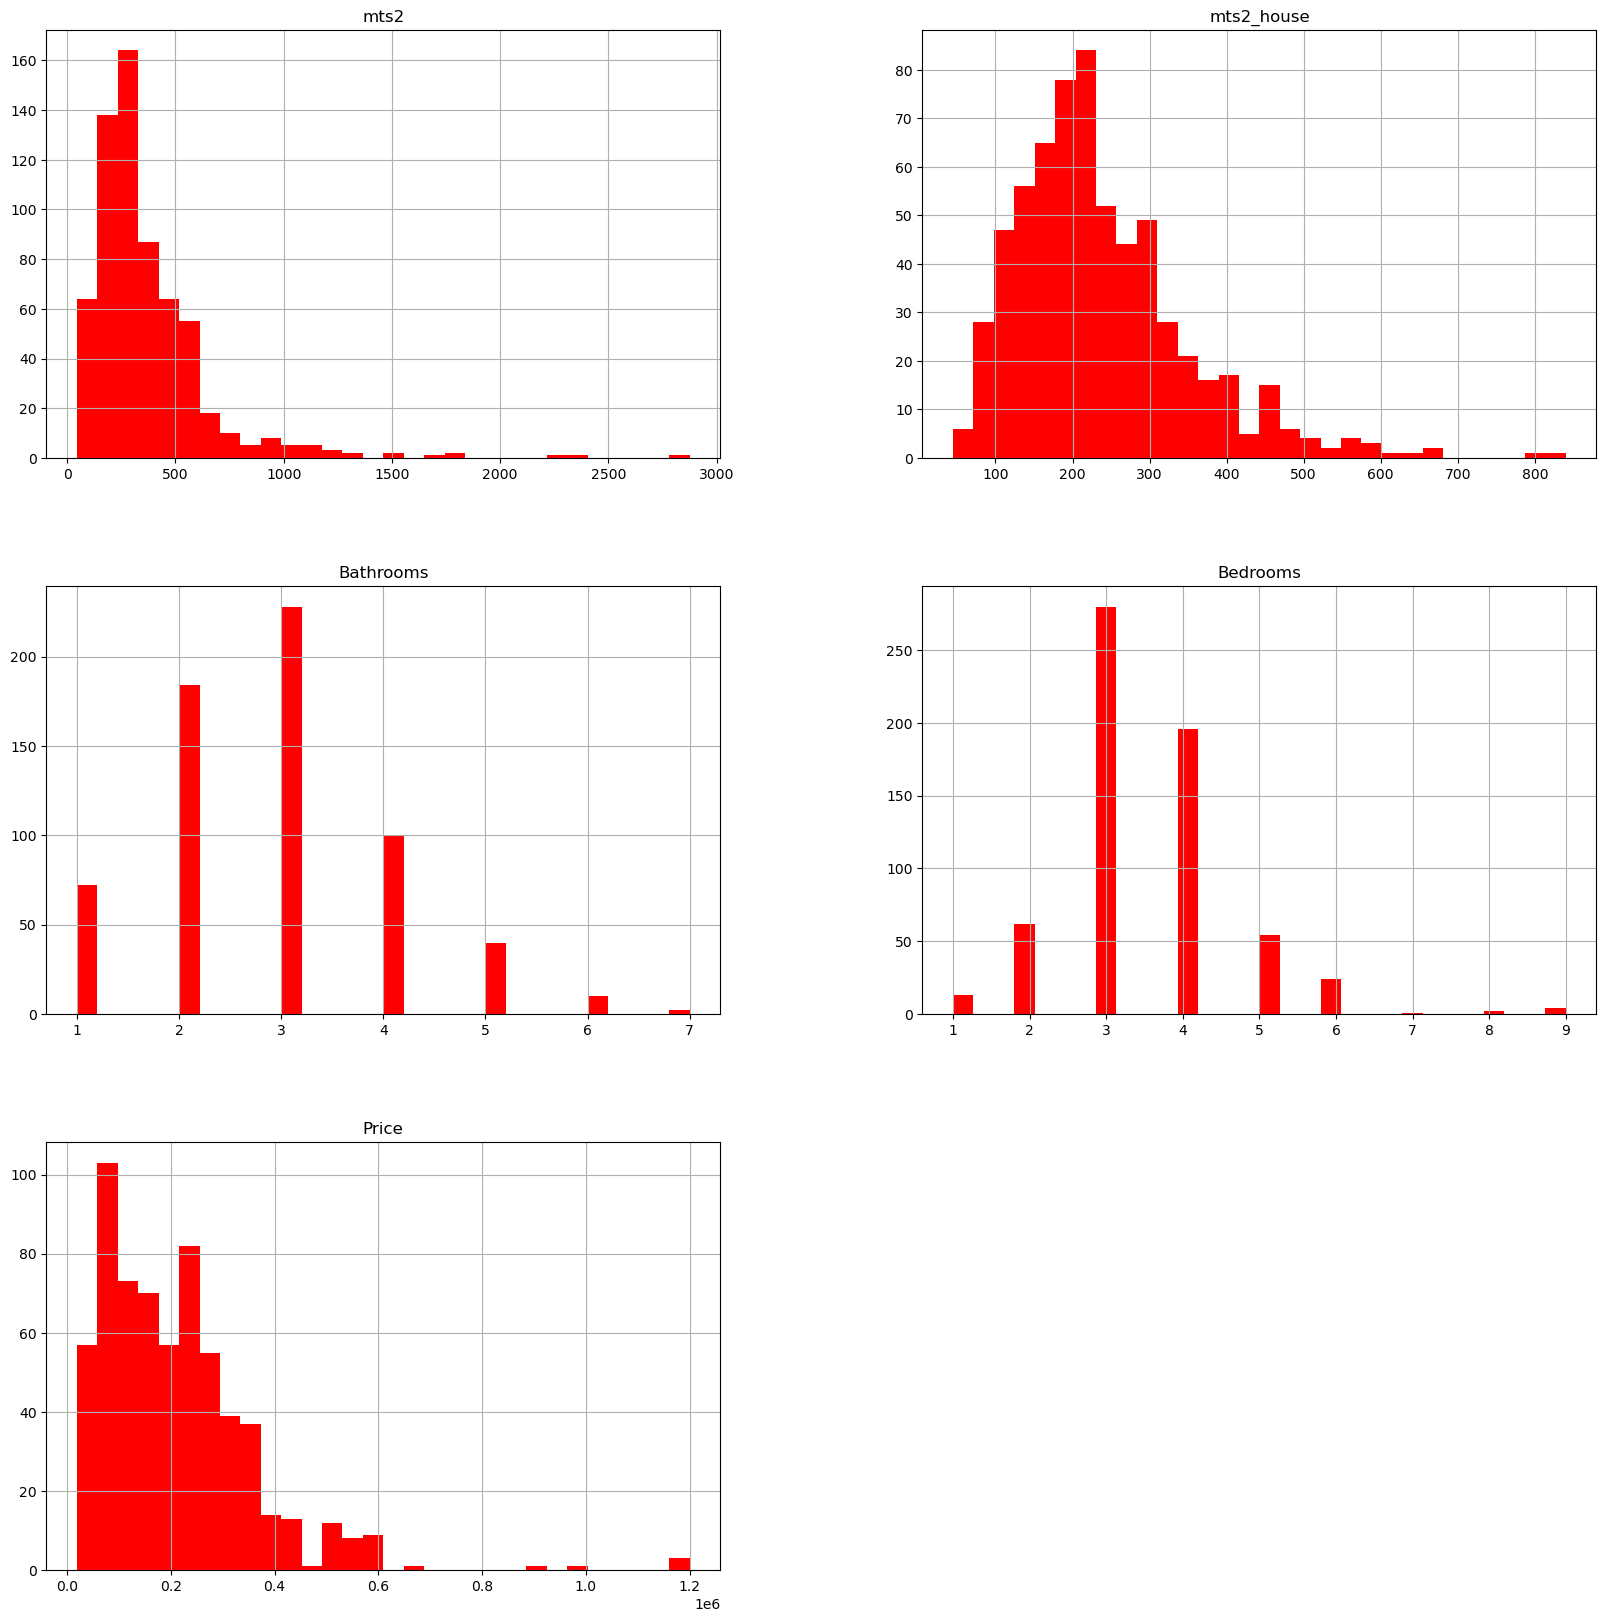

In [17]:
new_df.hist(bins=30, figsize=(20,20), color='r')
plt.show()

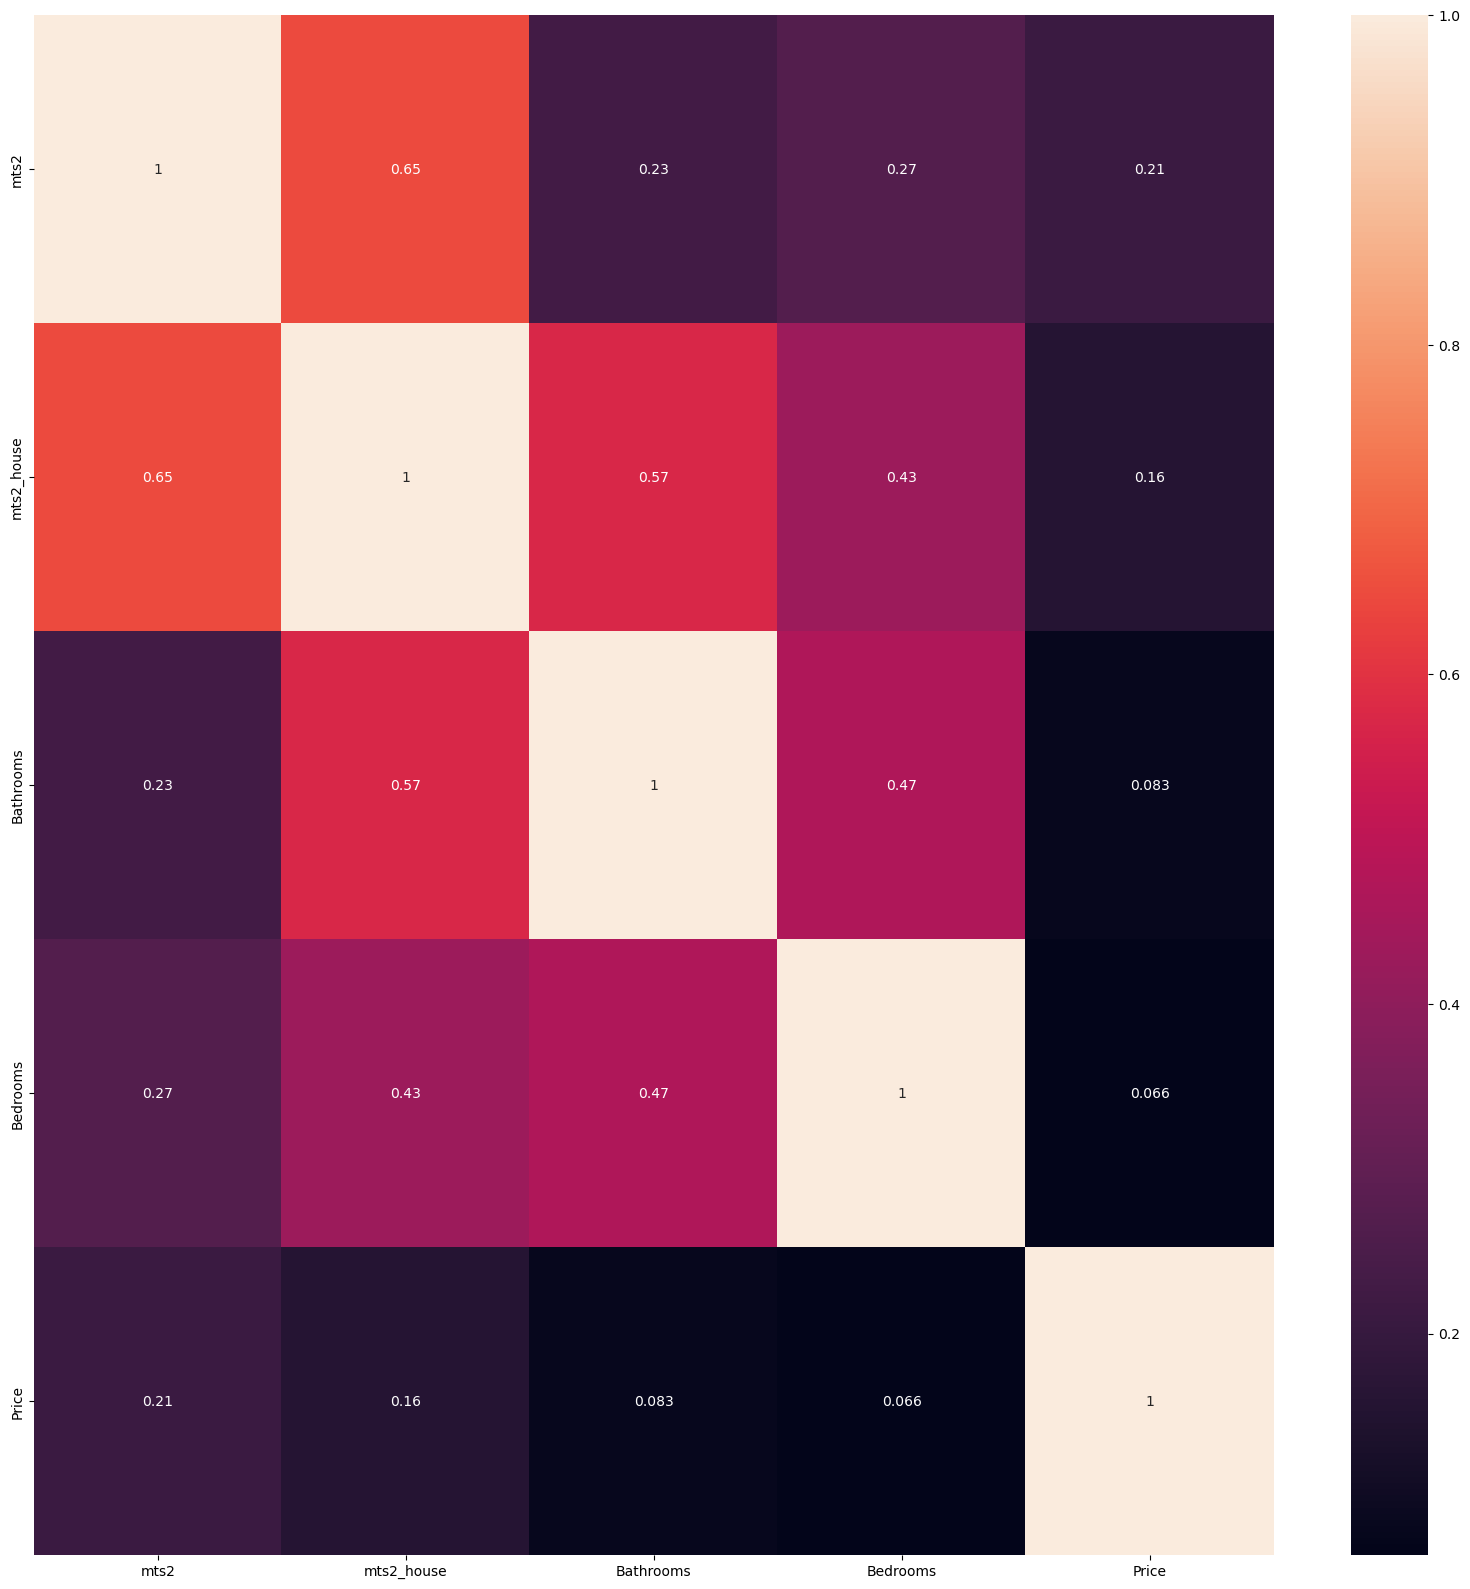

In [18]:
# El precio de las casas se encuentra mayormete enste los 150k y los 400k
# Hay gráficas que tienen la misma tendencia por lo cual puede que tengan mucha correlacion

corr = house_df.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot = True)
plt.show()

In [19]:
# El tamaño de la casa esta correlacionado con el terreno
# Algo raro es la alta correlación entre el tamaño de la casa y la cantidad de baños

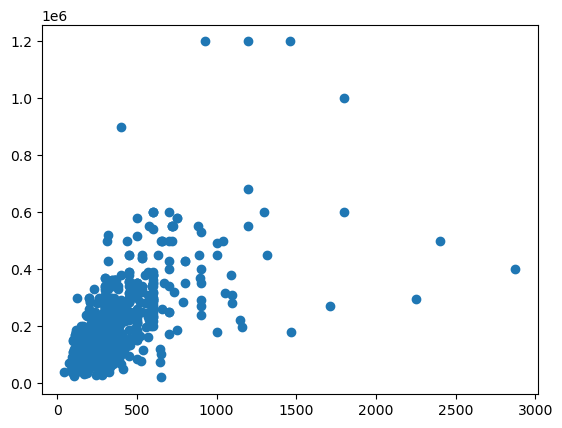

In [20]:
# Relación entre superficie y precio
plt.scatter(x='mts2', y='Price', data=new_df)
plt.show()

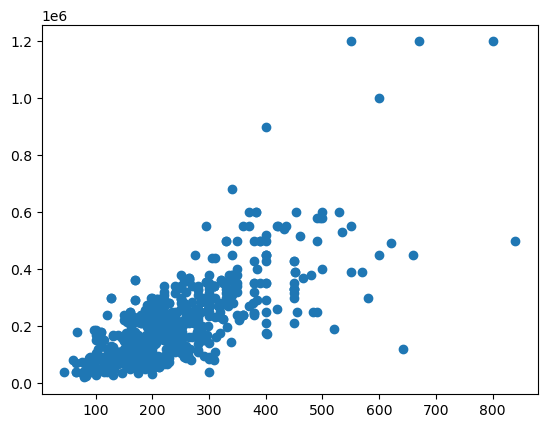

In [21]:
# Relación entre tamaño de la casa y precio
plt.scatter(x='mts2_house', y='Price', data=new_df)
plt.show()

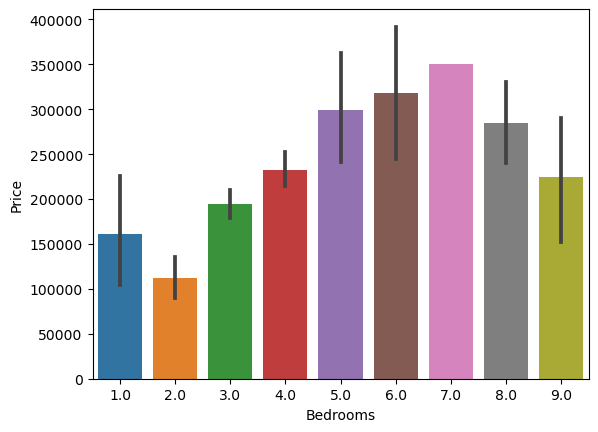

In [22]:
# Distribución de precio segun los dormitorios
sns.barplot(x='Bedrooms', y='Price', data=new_df)
plt.show()

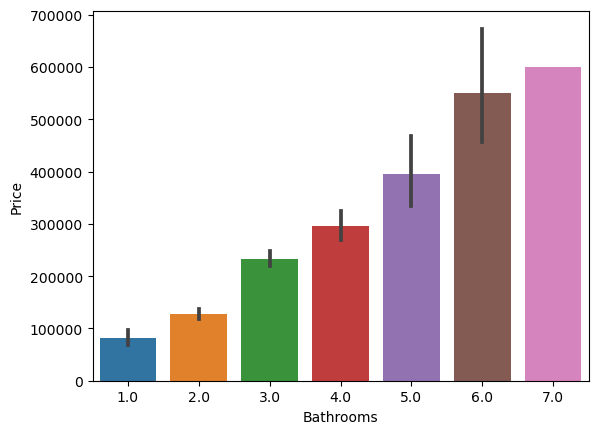

In [23]:
# Distribución de precio segun los baños
sns.barplot(x='Bathrooms', y='Price', data=new_df)
plt.show()

# La cantidad de baños suele estar muy ligado al precio

<h1 style='color: green'>Regresión lineal Múltiple</h1>

In [30]:
# el modelo de regresion lineal simple no lleva escalado #
#X= new_df.iloc[:,:-1].values
X= new_df.iloc[:,2:-1].values
X

array([[300., 175.,   3.,   3.],
       [120., 110.,   2.,   4.],
       [143., 200.,   4.,   4.],
       ...,
       [180., 175.,   1.,   2.],
       [170., 120.,   1.,   2.],
       [190., 146.,   1.,   2.]])

In [31]:
y = new_df.iloc[:,-1].values
y.shape

(636,)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [34]:
# Creación del modelo de Regresión Lineal Simple
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


# Predecir el conjunto de Test
y_pred = reg.predict(X_test)

In [35]:
reg.score(X_test, y_test)

0.6492061887161741

<h1 style='color: green'>Regresión Lineal Simple</h1>

In [43]:
X= new_df.iloc[:,3:4].values

In [44]:
y = new_df.iloc[:,-1].values

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=0)

In [46]:
# Creación del modelo de Regresión Lineal Simple
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


# Predecir el conjunto de Test
y_pred = reg.predict(X_test)

In [47]:
reg.score(X_test, y_test)

0.5618182468137469

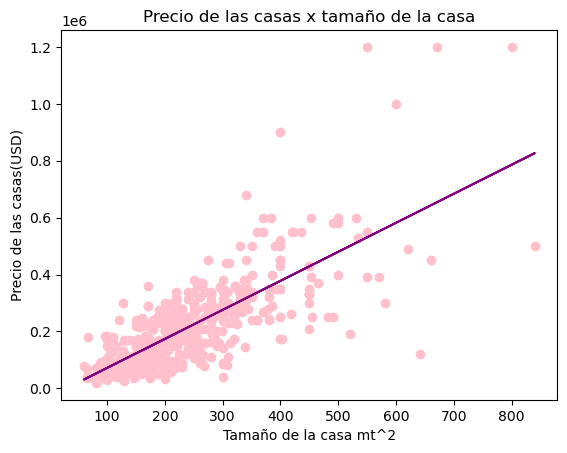

In [48]:
# Visualizar los resultados del conjunto de train
plt.scatter(X_train, y_train, color='pink')
plt.plot(X_train, reg.predict(X_train), color='purple')
plt.title('Precio de las casas x tamaño de la casa' )
plt.xlabel('Tamaño de la casa mt^2')
plt.ylabel('Precio de las casas(USD)')
plt.show()

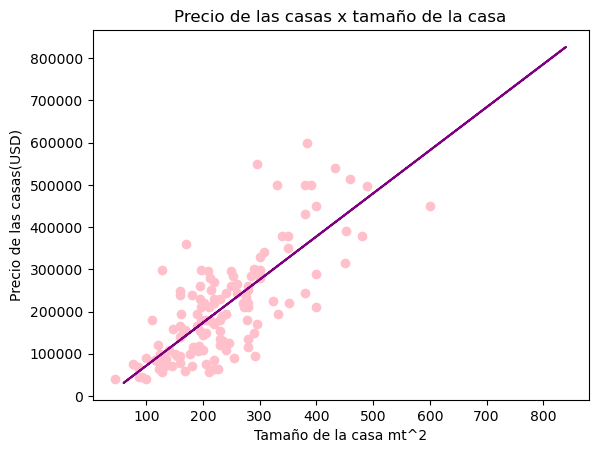

In [49]:
# Visualizar los resultados del conjunto de test
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_train, reg.predict(X_train), color='purple')
plt.title('Precio de las casas x tamaño de la casa' )
plt.xlabel('Tamaño de la casa mt^2')
plt.ylabel('Precio de las casas(USD)')
plt.show()

<h1 style='color: green'>Regresión Lineal Simple Red Neuronal</h1>

In [64]:
import tensorflow as tf

In [80]:
X= new_df.iloc[:,3:4]
y = new_df.iloc[:,-1]

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler_x= MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaler= scaler_x.fit_transform(X)

y= y.values.reshape(-1,1)
y_scaler = scaler_y.fit_transform(y)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y_scaler, test_size= 0.2, random_state=0)

In [83]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1,input_shape=[1] ))

#model.add(tf.keras.layers.Dense(units=100, activation='relu',input_shape=(7,)))
#model.add(tf.keras.layers.Dense(units=100, activation='relu'))
#model.add(tf.keras.layers.Dense(units=1, activation='linear'))

In [84]:
from keras import backend as K

def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

model.compile(optimizer= 'Adam', loss='mean_squared_error', metrics=[soft_acc])

In [85]:
model.fit(X_train,y_train, epochs=100, batch_size= 20, validation_split=0.2)

Epoch 1/100
21/21 [==============================] - 1s 15ms/step - loss: 0.0357 - soft_acc: 0.8706 - val_loss: 0.0281 - val_soft_acc: 0.9167
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.0288 - soft_acc: 0.8952 - val_loss: 0.0224 - val_soft_acc: 0.9250
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.0237 - soft_acc: 0.9087 - val_loss: 0.0183 - val_soft_acc: 0.9333
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0199 - soft_acc: 0.9333 - val_loss: 0.0153 - val_soft_acc: 0.9333
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0172 - soft_acc: 0.9357 - val_loss: 0.0135 - val_soft_acc: 0.9333
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0155 - soft_acc: 0.9405 - val_loss: 0.0123 - val_soft_acc: 0.9417
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0145 - soft_acc: 0.9405 - val_loss: 0.0115 - val_soft_acc: 0.9417
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0088 - soft_acc: 0.9833 - val_loss: 0.0059 - val_soft_acc: 0.9750
Epoch 60/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0088 - soft_acc: 0.9833 - val_loss: 0.0058 - val_soft_acc: 0.9750
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0088 - soft_acc: 0.9833 - val_loss: 0.0058 - val_soft_acc: 0.9750
Epoch 62/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0088 - soft_acc: 0.9833 - val_loss: 0.0057 - val_soft_acc: 0.9750
Epoch 63/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0087 - soft_acc: 0.9833 - val_loss: 0.0057 - val_soft_acc: 0.9750
Epoch 64/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0087 - soft_acc: 0.9857 - val_loss: 0.0057 - val_soft_acc: 0.9750
Epoch 65/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0087 - soft_acc: 0.9857 - val_loss: 0.0057 - val_soft_acc: 0.9750
Epoch 

In [86]:
score = model.evaluate(X_test, y_test, batch_size=20)

7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - soft_acc: 0.9821


In [87]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


16/16 [==============================] - 0s 2ms/step


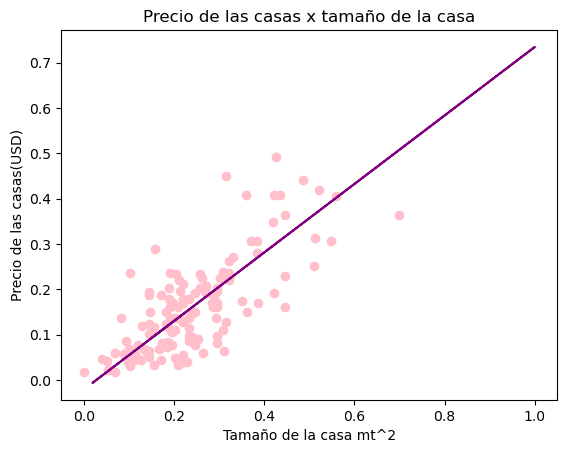

In [93]:
# Visualizar los resultados del conjunto de test
plt.scatter(X_test, y_test, color='pink')
plt.plot(X_train, model.predict(X_train), color='purple')
plt.title('Precio de las casas x tamaño de la casa' )
plt.xlabel('Tamaño de la casa mt^2')
plt.ylabel('Precio de las casas(USD)')
plt.show()

In [95]:
new_df.to_csv('mendoza.csv', index='False')